# Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_csv('Resources/cleaned_wildfire_3.csv', index_col=[0])
df.head()

,fire_name,fire_size,stat_cause_descr,latitude,longitude,state,discovery_month,putout_time,Vegetation,Temp_pre_30,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,year
0,WNA 1,1.00,Debris Burning,39.6414,-119.3083,NV,Jun,0,0,16.275967,...,44.778429,37.140811,35.353846,0.0,10.4,7.2,0.0,0.0,0.487447,2005
1,CRAZY,1.00,Other,48.8394,-99.7185,ND,Apr,0,15,4.600950,...,64.606509,55.943038,54.337838,0.0,12.3,1.8,0.0,0.0,0.291683,2004
2,STO3573155,2.00,Debris Burning,35.7189,-92.3350,AR,Jan,0,15,3.490698,...,76.091398,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.227270,2014
3,AXE RONDEAU,1.20,Debris Burning,48.8330,-99.7836,ND,Apr,0,15,-0.891635,...,77.575012,75.963981,71.173116,0.0,21.2,21.2,9.2,0.0,0.292303,2007
4,FY2001-EARLY-021,30.18,Debris Burning,31.2590,-84.8956,GA,Oct,0,12,20.079480,...,67.551783,61.733788,60.328571,0.0,0.0,0.0,0.0,0.0,0.162416,2000


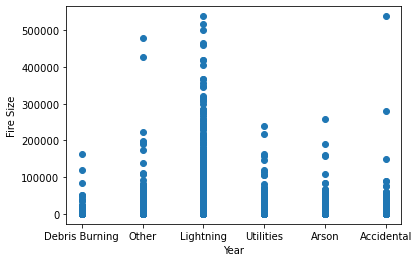

In [17]:
plt.scatter(df.stat_cause_descr, df.fire_size)
plt.xlabel('Year')
plt.ylabel('Fire Size')
plt.show()